In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

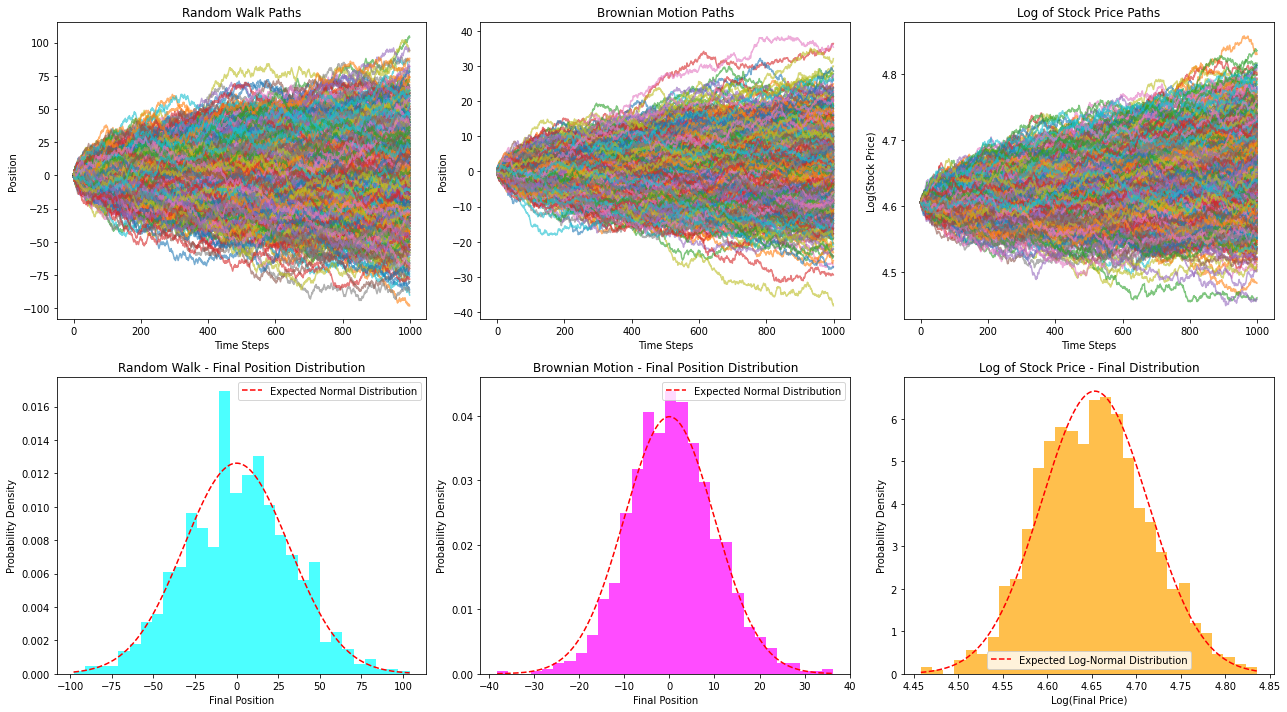

In [14]:
# Parameters
steps = 1000           # Number of time steps
num_simulations = 1000 # Number of simulations
drift = 0.0005         # Drift rate for the stock price model
volatility = 0.006     # Volatility in stock price dynamics
time_step = 0.1        # Increment per step

# Storage for simulation data
rand_walk_paths = []
brownian_motion_paths = []
stock_price_simulations = []
rand_walk_final = []
brownian_final = []
log_stock_final = []

# Simulation loop
for _ in range(num_simulations):
    # 1. Simple Random Walk Simulation
    random_steps = np.random.choice([-1, 1], size=steps)
    random_walk = np.cumsum(random_steps)
    rand_walk_paths.append(random_walk)
    rand_walk_final.append(random_walk[-1])

    # 2. Brownian Motion (Wiener Process)
    brownian_steps = np.random.normal(0, np.sqrt(time_step), size=steps)
    brownian_motion = np.cumsum(brownian_steps)
    brownian_motion_paths.append(brownian_motion)
    brownian_final.append(brownian_motion[-1])

    # 3. Stock Price Dynamics (Geometric Brownian Motion)
    initial_price = 100
    prices = [initial_price]
    for _ in range(steps):
        noise_term = np.random.normal(0, np.sqrt(time_step))
        new_price = prices[-1] + prices[-1] * drift * time_step + prices[-1] * volatility * noise_term
        prices.append(new_price)
    stock_price_simulations.append(prices)
    log_stock_final.append(np.log(prices[-1]))

# Plotting the paths and final value distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plotting Random Walk Paths and Distribution
for trajectory in rand_walk_paths:  # Plotting a subset for clarity
    axes[0, 0].plot(trajectory, alpha=0.6)
axes[0, 0].set_title("Random Walk Paths")
axes[0, 0].set_xlabel("Time Steps")
axes[0, 0].set_ylabel("Position")

axes[1, 0].hist(rand_walk_final, bins=30, color='cyan', alpha=0.7, density=True)
x_vals = np.linspace(min(rand_walk_final), max(rand_walk_final), 1000)
axes[1, 0].plot(x_vals, norm.pdf(x_vals, loc=0, scale=np.sqrt(steps)), 'r--', label="Expected Normal Distribution")
axes[1, 0].set_title("Random Walk - Final Position Distribution")
axes[1, 0].set_xlabel("Final Position")
axes[1, 0].set_ylabel("Probability Density")
axes[1, 0].legend()

# Plotting Brownian Motion Paths and Distribution
for path in brownian_motion_paths:  # Plotting a subset for visibility
    axes[0, 1].plot(path, alpha=0.6)
axes[0, 1].set_title("Brownian Motion Paths")
axes[0, 1].set_xlabel("Time Steps")
axes[0, 1].set_ylabel("Position")

axes[1, 1].hist(brownian_final, bins=30, color='magenta', alpha=0.7, density=True)
x_vals = np.linspace(min(brownian_final), max(brownian_final), 1000)
axes[1, 1].plot(x_vals, norm.pdf(x_vals, loc=0, scale=np.sqrt(steps * time_step)), 'r--', label="Expected Normal Distribution")
axes[1, 1].set_title("Brownian Motion - Final Position Distribution")
axes[1, 1].set_xlabel("Final Position")
axes[1, 1].set_ylabel("Probability Density")
axes[1, 1].legend()

# Plotting Log of Stock Price Dynamics and Distribution
for stock_path in stock_price_simulations:  # Plotting a subset for illustration
    axes[0, 2].plot(np.log(stock_path), alpha=0.6)
axes[0, 2].set_title("Log of Stock Price Paths")
axes[0, 2].set_xlabel("Time Steps")
axes[0, 2].set_ylabel("Log(Stock Price)")

axes[1, 2].hist(log_stock_final, bins=30, color='orange', alpha=0.7, density=True)
x_vals = np.linspace(min(log_stock_final), max(log_stock_final), 1000)
mean_log_val = np.log(100) + (drift - 0.5 * volatility**2) * steps * time_step
std_log_val = volatility * np.sqrt(steps*time_step)
axes[1, 2].plot(x_vals, norm.pdf(x_vals, loc=mean_log_val, scale=std_log_val), 'r--', label="Expected Log-Normal Distribution")
axes[1, 2].set_title("Log of Stock Price - Final Distribution")
axes[1, 2].set_xlabel("Log(Final Price)")
axes[1, 2].set_ylabel("Probability Density")
axes[1, 2].legend()

plt.tight_layout()
plt.show()